### Insira nome e RM dos membros do grupo aqui

- Claudio Bispo 553472
- Patricia Naomi 552981
- Sara Ingrid 554021

-----------------------------------
# Questão 1 - Sintetizador de Voz  <font color='red'>(4 pontos)</font>.

Você recebeu dados de fonemas e sílabas em português, construídos na forma de dicionários para facilitar a busca e a utilização. Eles foram serializados no formato <code>.json</code>.

Certifique-se que os caminhos dos arquivos inseridos no dicionário refletem a disposição de arquivos na sua máquina, e que as palavras usadas estão no seu vocabulário de palavras.

Além disso você recebeu um arquivo <code>.txt</code> de texto contendo diversar frases.

**Faça um sintetizador de voz rundimentar que concatena os fonemas para reproduzir as frases recebidas.**

Esse tipo de sistema é chamado de TTS (Text to Speech).

Seu script deverá receber uma frase (ou lista de frases em um arquivo <code>.txt</code>) e gerar um arquivo de áudio <code>.wav</code> como saída.

In [75]:
# Você vai precisar dessar bibliotecas, mas caso ache necessário usar outras mais
# basta adiciona-las aqui. Lembre-se de dizer o motivo te ter importanto da biblioteca na frente dela

import librosa       # Processamento de audio
import soundfile as sf # Processamento de audio
import numpy as np     # Vetores numericos

import json # para ler arquivos JSON

In [76]:
# Adicione aqui seu código para ler os arquivos dict (json) e txt (frases de entrada)
# O dicionário de fonemas mapeia cada fonema para um arquivo de áudio
# O dicionário de sílabas mapeia cada palavra para uma lista de fonemas

# Carregar o dicionário de sílabas
with open('dicionario_silabas.json', 'r') as arquivo:
    dicionario_silabas = json.load(arquivo)

# Carregar o dicionário de fonemas
with open('dicionario_fonemas.json', 'r') as arquivo:
    dicionario_fonemas = json.load(arquivo)

# Ler as frases do arquivo .txt
with open('frases_tts.txt', 'r') as arquivo:
    frases = arquivo.read().splitlines()


In [77]:
# Adicione aqui seu código que chama a função sintetizador para cada frase lida 
# e gera os arquivos de áudio sintetizados (você pode fazer um 'for' sobre todas as frases)
# Para escrever um arquivo de áudio você pode usar o
# sf.write('nome_do_arquivo.wav', audio_sintetizado, samplerate=44100, format='wav') 

def sintetizador_voz(frase, dicionario_silabas, dicionario_fonemas):
    audio_sintetizado = np.array([]) # Inicializa o array de áudio

    # Quebrando a frase em palavras
    palavras = frase.split()
    
    for silaba in palavras:
        if silaba in dicionario_silabas: # Ver se a silaba está no dicionário
            fonemas = dicionario_silabas[silaba]
            for fonema in fonemas: # Aqui vê os fonemas da palavra
                if fonema in dicionario_fonemas: # Ver se o fonema está no dicionário
                    arquivo_fonema = dicionario_fonemas[fonema]
                    y, sr = librosa.load(arquivo_fonema, sr=44100)
                    audio_sintetizado = np.concatenate((audio_sintetizado, y)) if audio_sintetizado.size > 0 else y

    return audio_sintetizado, sr


In [78]:
for i, frase in enumerate(frases):
    audio_sintetizado, sr = sintetizador_voz(frase, dicionario_silabas, dicionario_fonemas)
    sf.write(f'frase_linha{i+1}.wav', audio_sintetizado, sr, format='wav')

audio_sintetizado, sr = sintetizador_voz(frases[0], dicionario_silabas, dicionario_fonemas)

----------------------------------------
# Questão 2 - Análise Exploratória FIFA 2019

Você está recebendo um arquivo .csv com dados do FIFA 2019. Você deve responder os itens a seguir sobre o dataset.

In [79]:
# Carregue aqui as bibliotecas que você usar

import pandas as pd
import statistics as sts
import numpy as np
import seaborn as sns #biblioteca utilizada para graficos
import matplotlib.pyplot as plt

### a) Carregue os dados e filtre as linhas e colunas como visto em aula. <font color='red'>(1 ponto)</font>

Queremos manter as colunas **Name**, **Age**, **Nationality**, **Club**, **Overall**, **Value**, **Wage** e **Position**.

In [80]:
# Coloque seu código aqui

dados = pd.read_csv('data_fifa2019.csv', sep=',')


colunas = ['Name', 'Age', 'Nationality', 'Club', 'Overall', 'Value', 'Wage', 'Position']
dados1 = dados[colunas]

dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         18207 non-null  object
 1   Age          18207 non-null  int64 
 2   Nationality  18207 non-null  object
 3   Club         17966 non-null  object
 4   Overall      18207 non-null  int64 
 5   Value        18207 non-null  object
 6   Wage         18207 non-null  object
 7   Position     18147 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.1+ MB


In [81]:
dados_ = pd.read_csv('data_fifa2019.csv', sep=',')
dados_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### b) Faça uma função para arrumar os valores da coluna Value e Wage dos jogadores. <font color='red'>(1 ponto)</font>

A função deve converter o valor e salário (strings) para números reais (float).

In [82]:
# Coloque seu código aqui

# Função para converter os valores para milhares e milhões
def conversao_para_float(valor):
    valor_sem_simbolo = valor.replace('€', '')
    if valor_sem_simbolo.endswith('K'):
        return float(valor_sem_simbolo[:-1]) * 1000 #multiplicando o valor por mil
    elif valor_sem_simbolo.endswith('M'):
        return float(valor_sem_simbolo[:-1]) * 1000000 #multiplicando o valor por milhão
    else:
        return float(valor_sem_simbolo)


dados1['Value'] = dados['Value'].apply(conversao_para_float)
dados1['Wage'] = dados['Wage'].apply(conversao_para_float)

/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/3463958562.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados1['Value'] = dados['Value'].apply(conversao_para_float)
/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/3463958562.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados1['Wage'] = dados['Wage'].apply(conversao_para_float)


### c) Usando a função overall_classes, crie uma coluna denominada 'Performance' com as classes de jogadores baseado no valor da coluna 'Overall'.  <font color='red'>(0.5 ponto)</font>

In [83]:
# Criando três classes baseado no Overall
# A função recebe um valor e retorna uma classe categórica da performance do jogador (Low, Normal, High)
def overall_classes(x):
    if x < 60:
        return 'Baixa'
    if x < 75:
        return 'Normal'
    return 'Alta'

In [84]:
# Coloque seu código aqui
dados1['Performance'] = dados1['Overall'].apply(overall_classes)
dados1.head()

/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/1615150915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados1['Performance'] = dados1['Overall'].apply(overall_classes)


,Name,Age,Nationality,Club,Overall,Value,Wage,Position,Performance
0,L. Messi,31,Argentina,FC Barcelona,94,110500000.0,565000.0,RF,Alta
1,Cristiano Ronaldo,33,Portugal,Juventus,94,77000000.0,405000.0,ST,Alta
2,Neymar Jr,26,Brazil,Paris Saint-Germain,92,118500000.0,290000.0,LW,Alta
3,De Gea,27,Spain,Manchester United,91,72000000.0,260000.0,GK,Alta
4,K. De Bruyne,27,Belgium,Manchester City,91,102000000.0,355000.0,RCM,Alta


### d) Faça quatro gráficos boxplot. <font color='red'>(1 ponto)</font>
Da **idade (age)**, do **valor (value)**, do **salário (wage)** e do **overall** dos jogadores.

Pinte cada gráfico boxplot com a coluna **Performance** realizada no item c.

O que você pode interepretar desses gráficos?

/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/94018763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance', y=col, data=dados1, ax=axes[i//2, i%2], palette="Set3")
/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/94018763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance', y=col, data=dados1, ax=axes[i//2, i%2], palette="Set3")
/var/folders/xh/8vqnxqg943717l0twpmpw8lc0000gn/T/ipykernel_30216/94018763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Performance', y=col,

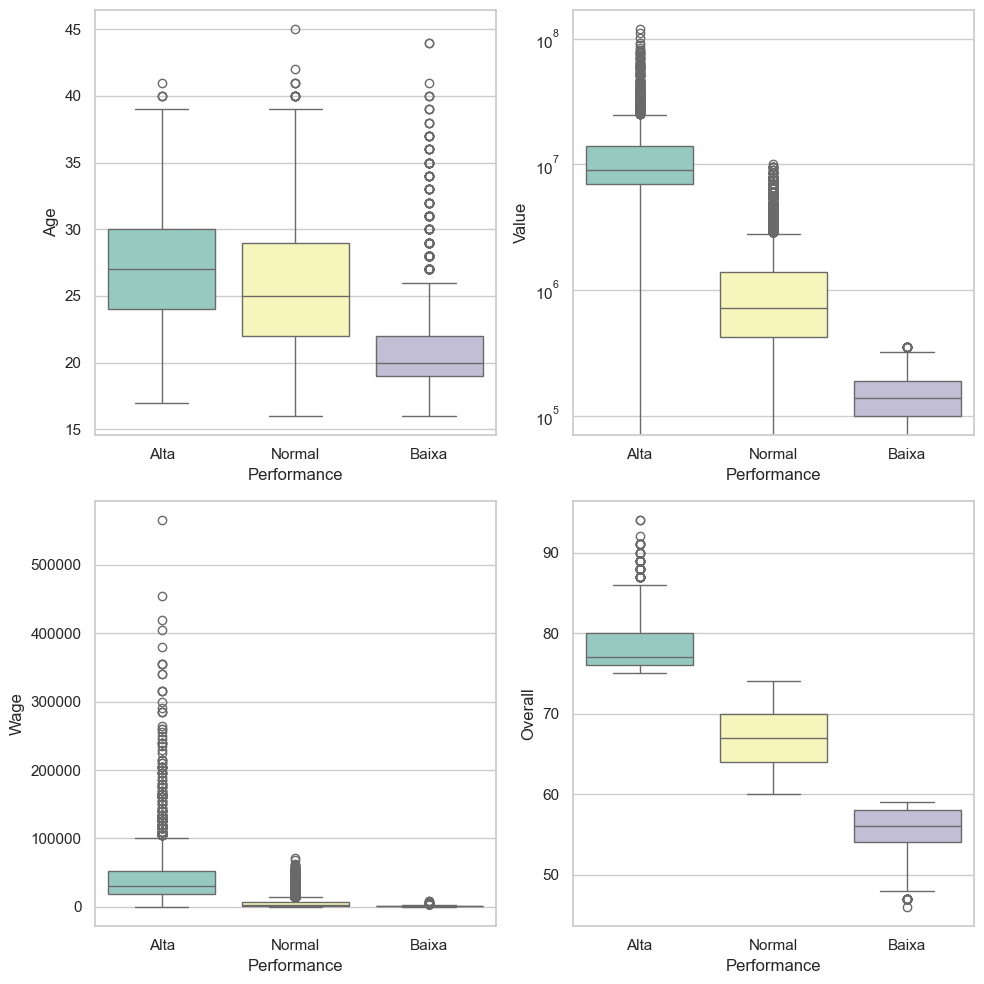

In [85]:
# Coloque seu código aqui

# coloca linhas no gráfico para melhor visualização
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, col in enumerate(['Age', 'Value', 'Wage', 'Overall']):
    sns.boxplot(x='Performance', y=col, data=dados1, ax=axes[i//2, i%2], palette="Set3")
    if i == 1:  # Aplica a escala logarítmica apenas no segundo subplot
      axes[i//2, i%2].set_yscale('log')
plt.tight_layout()
plt.show()
#axes[1].set_yscale('log') Pode ajudar a modificar a escala do eixo y quando os valores são muito grandes

### e) Cálcule a média, desvio padrão e correlação, e plot a dispersão e distribuição das colunas numéricas. <font color='red'>(1.25 pontos)</font>

Dica: tudo pode ser resolvido com três linhas de código vistas no Jupyter Tópico 2.

In [86]:
# Coloque seu código aqui

# medidas foram feitas usando pandas, fizemos por coluna numérica

print('\n*** MÉDIA POR COLUNA ***\n')
print(dados1['Wage'].mean())
print(dados1['Value'].mean())
print(dados1['Age'].mean())
print(dados1['Overall'].mean())

print('\n*** DESVIO PADRÃO POR COLUNA ***\n')
print(dados1['Wage'].std())
print(dados1['Value'].std())
print(dados1['Age'].std())
print(dados1['Overall'].std())

print('\n*** CORRELAÇÃO TABELA ***\n')
dados1.corr(numeric_only=True)



*** MÉDIA POR COLUNA ***

9731.312132696215
2410695.8861976163
25.122205745043114
66.23869940132916

*** DESVIO PADRÃO POR COLUNA ***

21999.290405992528
5594932.6705608815
4.66994271341431
6.9089296118828925

*** CORRELAÇÃO TABELA ***



,Age,Overall,Value,Wage
Age,1.000000,0.452350,0.075022,0.141145
Overall,0.452350,1.000000,0.627085,0.571926
Value,0.075022,0.627085,1.000000,0.858442
Wage,0.141145,0.571926,0.858442,1.000000


<Axes: xlabel='Overall', ylabel='Age'>

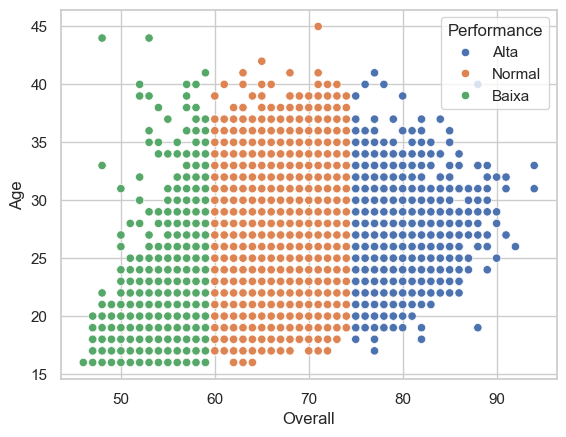

In [87]:
# Primeiro vamos criar um gráfico por coluna de valor em função do overall,
#depois vamos chamar o método pairplot para gerar a comparação com todos os campos numéricos
sns.scatterplot(data=dados1, x='Overall', y='Age', hue='Performance')

<Axes: xlabel='Overall', ylabel='Value'>

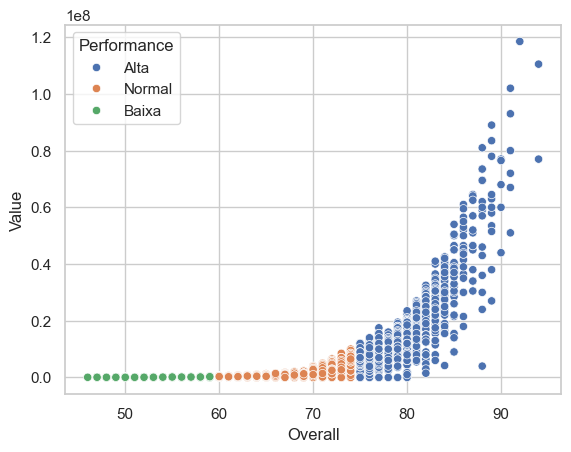

In [88]:
sns.scatterplot(data=dados1, x='Overall', y='Value', hue='Performance')


<Axes: xlabel='Overall', ylabel='Wage'>

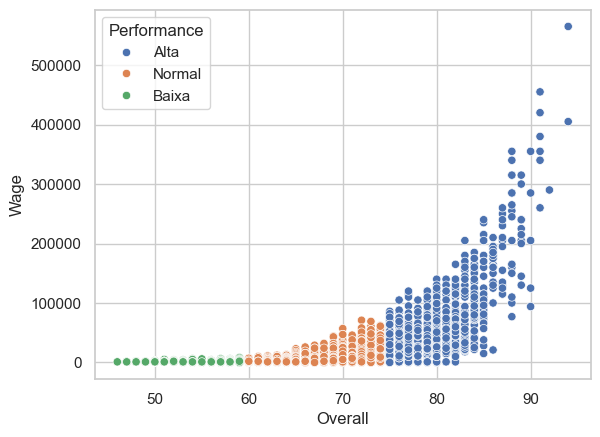

In [89]:
sns.scatterplot(data=dados1, x='Overall', y='Wage', hue='Performance')


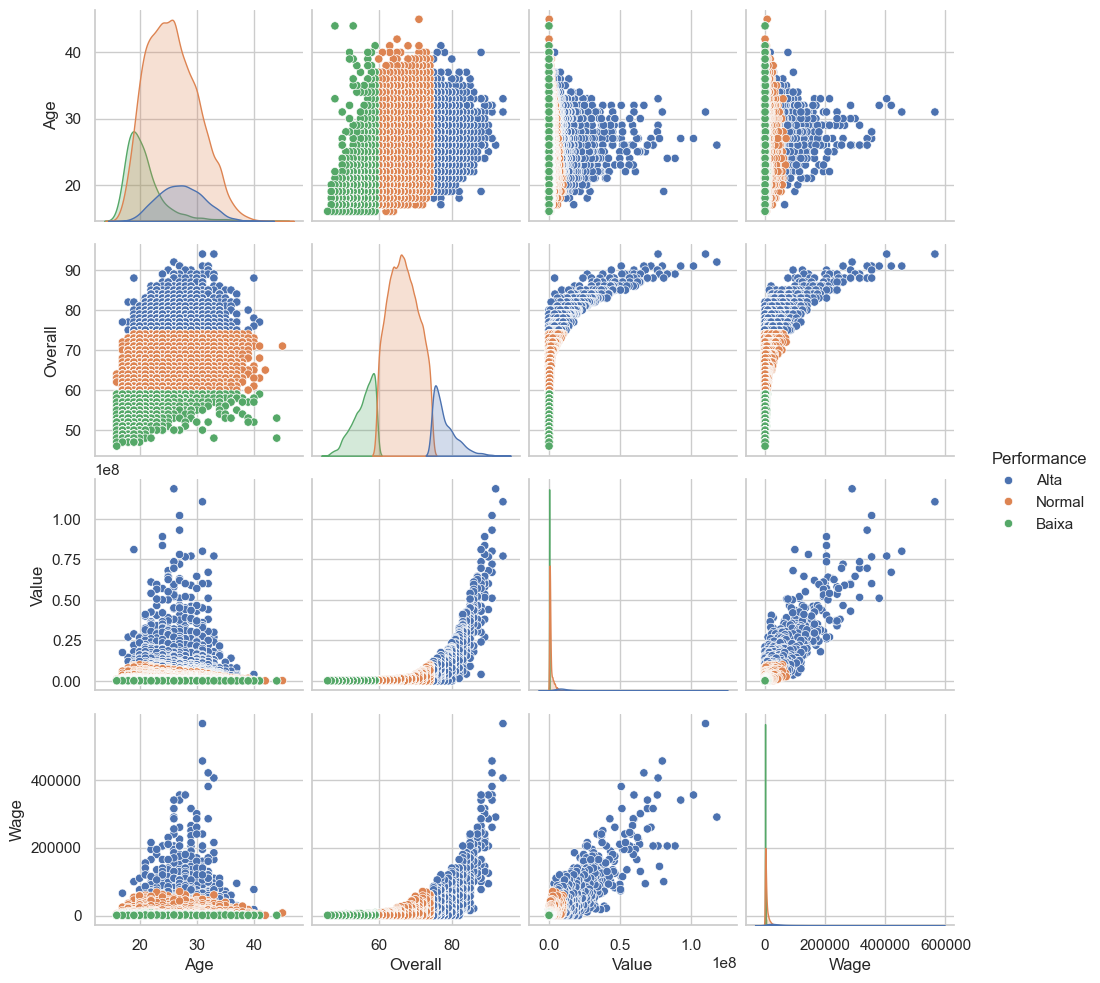

In [90]:
sns.pairplot(dados1, hue='Performance')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Overall'}>],
       [<Axes: title={'center': 'Value'}>,
        <Axes: title={'center': 'Wage'}>]], dtype=object)

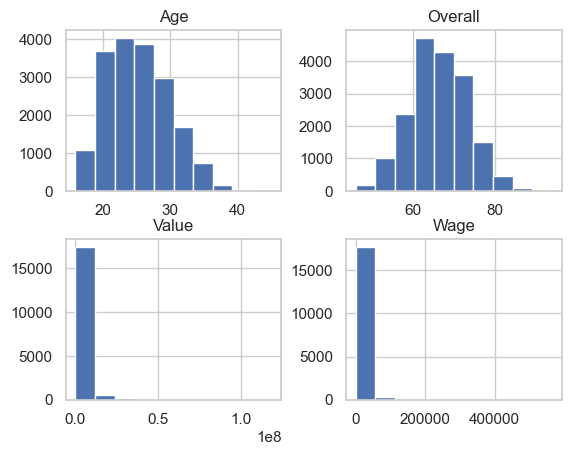

In [91]:
dados1.hist()

### f) Baseado nas colunas selecionadas e nas estatíticas você é capaz de propor uma estratégia de investimento em jogadores? <font color='red'>(1.25 pontos)</font>

Dica: lembre-se que para investir você quer comprar um jogador barato (o que significa barato?) e de boa performance, que possa valorizar (para poder valorizar ele pode ser velho? quanto é velho para o futebol?) de forma a ser vendido por um valor maior no futuro. A posição é importante? A nacionalidade é importante? Existe alguma informação adicional que eliminamos no item (a) que poderia ser útil para criar essa estratégia?

De acordo com as informações geradas pelos gráficos, inicialmente podemos considerar algumas variáveis para decidir qual poderia ser o melhor caminho na escolha do investimento. Olhando para a idade dos jogadores disponíveis na base de dados, podemos verificar que ela não é um fator determinante para a performance, uma vez que a correlação entre elas é fraca e o gráfico de dispersão demonstra que há muitos jogadores entre 20 e 40 anos que podem ter baixa, média ou alta performance. Quanto ao valor do jogador, sabemos que há um limite quanto ao que pode ser considerado válido para investimento e os melhores jogadores são mais caros e consequentemente recebem um salário maior, no entanto, há muitos jogadores disponíveis que não são os mais baratos porém estão longe de serem os mais caros com uma performance alta, mais especificamente entre 70 e 85. Então, de um modo geral, investir em um jogador entre 20 e 30 anos e com overall entre 70 e 85 com um valor mediano de mercado parece ser a melhor escolha. Porém, outros fatores com posição do jogar podem mudar esse cenário, e trazer luz a fatores como peso e altura, caso o mercado esteja a procura de um goleiro, por exemplo. A  posição do jogador poderia ter sido mantida para melhorar a segmentação dos dados e melhorar a interpretação, pois provavelmente a posição interfere em muito em fatores que foram analisados como salário e valor de mercado.